# DAND Final project: Bike sharing 

# Exploratory Data Analysis 

#### part of Udacity Data Analyst formation, May 2020, v2

##### By Mauricio Cabreira

# Overview 
Bay Area Bike Share (now Ford GoBike) provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. 

Users can unlock bikes from various stations throughout each city, and return them to any station within the same city. Clients pay for the service either through a yearly subscription or by purchasing a 24-hour or 3-day pass. Under service conditions, they can make an unlimited number of trips: trips under thirty minutes in length have no additional charge, longer trips will incur overtime fees.

Users that pay the subscription are identified as "Subscribers" in this analysis. Users that purchase the passes, are called "Customers".

The data and details of the service can be founde here: https://www.lyft.com/bikes/bay-wheels/system-data

# Introduction

**In this notebook an exploratory analysis of the data is done. After that, there will be a Explanatory presenntation using Jupyter in a different file.**

It is important to pose some initial questions to drive the analysis. Some questions starting questions are:

How many rides in the period? year, month. and split by customer type.

How many bike stations the service provides? 

What are the busiest ones (so they need to keep a close eye to refill them)? 
What are the quietest ones? (are there people really using it?)

Who used the bikes most during the week? Subscribers or Customers? 
What about the weekends?

What are the peak times during the week? And weekend?

Does the volume of rides are similar during the year?

In [1]:
#Import needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import time
import json 
import seaborn as sns
import math 
from datetime import datetime
from functools import reduce

from functions_for_this_analysis import haversine

It is important to pose these initial set of questions about some aspects of the service to guide the analysis, and then start understaing the data better in order to extract some insights:

**1) Service:**

-how many locations? 

-what is the number of trips associated to locations?
-what are the typical durations of the trips?
-what are the typical distances?


**2) Customer habits:** 

-What is the volume of trips over the year, month, week?

-During the week, what are the busiest times?

-What about the weekends?

-What is the split between subscribers and casual users?

-How many trips users take over the periods?

-What are the users profiles?

In [3]:
#reading the file, so Analyst does not have to run all the processes above to query.
df_2019 = pd.read_csv('./data/2019_lyft_bike_sharing_rides.csv') 
df_2019.head(1)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,distance_km,duration_min,hour_of_the_day,day_of_the_week,month,day
0,2019-01-31 17:57:44,2019-02-01 16:24:49,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,5.3,1347.08,17,Thu,Jan,31


In [2]:
#convert date to datetime
df_2019['start_time']= pd.to_datetime(df_2019['start_time']) 
df_2019['end_time']= pd.to_datetime(df_2019['end_time']) 


NameError: name 'pd' is not defined

In [1]:
df_2019.shape

NameError: name 'df_2019' is not defined

2,407,259 rides in 2019. Spread over the months as below:


In [11]:
df_2019.groupby('month').month.count()

month
Apr    239047
Aug    210563
Dec    125634
Feb    183215
Jan    191834
Jul    187367
Jun    189069
Mar    256078
May    182148
Nov    184423
Oct    239895
Sep    217986
Name: month, dtype: int64

In [6]:
df_2019.groupby('user_type').user_type.count()

user_type
Customer       472217
Subscriber    1935042
Name: user_type, dtype: int64

In [14]:
df_subscriber = df_2019.query('user_type == "Subscriber"')
df_customer = df_2019.query('user_type == "Customer"')



In [15]:
df_subscriber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1935042 entries, 0 to 2407258
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         float64       
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           float64       
 7   end_station_name         object        
 8   end_station_latitude     float64       
 9   end_station_longitude    float64       
 10  bike_id                  int64         
 11  user_type                object        
 12  distance_km              float64       
 13  duration_min             float64       
 14  hour_of_the_day          int64         
 15  day_of_the_week          object        
 16  month                    object        
 17  day                      in

In [17]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472217 entries, 2 to 2407240
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               472217 non-null  datetime64[ns]
 1   end_time                 472217 non-null  datetime64[ns]
 2   start_station_id         472217 non-null  float64       
 3   start_station_name       472217 non-null  object        
 4   start_station_latitude   472217 non-null  float64       
 5   start_station_longitude  472217 non-null  float64       
 6   end_station_id           472217 non-null  float64       
 7   end_station_name         472217 non-null  object        
 8   end_station_latitude     472217 non-null  float64       
 9   end_station_longitude    472217 non-null  float64       
 10  bike_id                  472217 non-null  int64         
 11  user_type                472217 non-null  object        
 12  distance_km    

Trips per month / subscriber

In [20]:
df_subscriber.groupby('month').month.count()

month
Apr    203185
Aug    164928
Dec     56662
Feb    163414
Jan    168561
Jul    152904
Jun    156337
Mar    219188
May    156663
Nov    142713
Oct    184857
Sep    165630
Name: month, dtype: int64

Trips per month / customer

In [21]:
df_customer.groupby('month').month.count()

month
Apr    35862
Aug    45635
Dec    68972
Feb    19801
Jan    23273
Jul    34463
Jun    32732
Mar    36890
May    25485
Nov    41710
Oct    55038
Sep    52356
Name: month, dtype: int64

Duration values. There are some outliers, i.e.: a ride that lasted 24h.

In [25]:
df_subscriber.duration_min.describe()

count    1.935042e+06
mean     1.117680e+01
std      2.042858e+01
min      1.000000e+00
25%      5.620000e+00
50%      8.820000e+00
75%      1.342000e+01
max      1.435230e+03
Name: duration_min, dtype: float64

In [30]:
df_2019.head(1)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,distance_km,duration_min,hour_of_the_day,day_of_the_week,month,day
0,2019-01-31 17:57:44,2019-02-01 16:24:49,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,5.3,1347.08,17,Thu,Jan,31


In [40]:
df_2019.query('duration_min > 240').duration_min.count()

4297

In [44]:
df_2019.query('duration_min <= 1.5').duration_min.count()

11034

there are +4k rides over 4hours...which is unusual for a bike sharing..and +32K less than 2 minutes...also unusual for such service.
I will remove those. 

In [64]:
df_2019.drop(df_2019[df_2019.duration_min > 240].index, inplace = True) 
df_2019.drop(df_2019[df_2019.duration_min <= 1.5].index, inplace = True) 

In [63]:
df_2019.query('duration_min > 240').duration_min.count()

0

In [65]:
df_2019.query('duration_min <= 1.5').duration_min.count()

0

In [68]:
df_2019.duration_min.describe()

count    2.391928e+06
mean     1.239089e+01
std      1.291744e+01
min      1.520000e+00
25%      6.020000e+00
50%      9.500000e+00
75%      1.472000e+01
max      2.400000e+02
Name: duration_min, dtype: float64

In [45]:
df_subscriber.distance_km.describe()

count    1.935042e+06
mean     1.881222e+00
std      5.204441e+01
min      0.000000e+00
25%      9.000000e-01
50%      1.400000e+00
75%      2.200000e+00
max      1.280200e+04
Name: distance_km, dtype: float64

In [46]:
df_customer.distance_km.describe()

count    472217.000000
mean          2.802325
std         113.268754
min           0.000000
25%           1.000000
50%           1.600000
75%           2.400000
max       12803.300000
Name: distance_km, dtype: float64

In [59]:
df_2019.query('distance_km < 0.05').duration_min.count()

59169

There is a substantial amount of rides with less than 0.05km (0.031 miles). That is too short, basically the ride did not happen as there is no point in doing so. Remove

In [55]:
df_2019.query('distance_km > 50').duration_min.count()

74

Less strange data about the distances. I am a speed road cyclist, and riding anything 20km in a Lyft bike is painful. I am removing those rides above 50km.

In [69]:
df_2019.drop(df_2019[df_2019.distance_km < 0.05].index, inplace = True) 
df_2019.drop(df_2019[df_2019.distance_km > 50].index, inplace = True) 

In [70]:
df_2019.distance_km.describe()

count    2.337862e+06
mean     1.741442e+00
std      1.050544e+00
min      1.000000e-01
25%      1.000000e+00
50%      1.500000e+00
75%      2.300000e+00
max      1.650000e+01
Name: distance_km, dtype: float64

In [72]:
df_subscriber = df_2019.query('user_type == "Subscriber"')
df_customer = df_2019.query('user_type == "Customer"')



### Service Analysis:

In [73]:
df_subscriber_week =  df_2019.query('user_type == "Subscriber" & (day_of_the_week == "Mon" | day_of_the_week == "Tue" | day_of_the_week == "Wed" | day_of_the_week == "Thu" | day_of_the_week == "Fri" )')
df_customer_week =  df_2019.query('user_type == "Customer" & (day_of_the_week == "Mon" | day_of_the_week == "Tue" | day_of_the_week == "Wed" | day_of_the_week == "Thu" | day_of_the_week == "Fri" )')

df_subscriber_weekend =  df_2019.query('user_type == "Subscriber" & (day_of_the_week == "Sat" | day_of_the_week == "Sun" )')
df_customer_weekend =  df_2019.query('user_type == "Customer" & (day_of_the_week == "Sat" | day_of_the_week == "Sun" )')

df_subscriber_week.user_type.count(),  df_customer_week.user_type.count(), df_subscriber_weekend.user_type.count(), df_customer_weekend.user_type.count()





(1619529, 320941, 278461, 118931)

In [74]:
#Ratio week: almost 5x more subs than customer
df_subscriber_week.user_type.count() /  df_customer_week.user_type.count()

5.046189174957391

In [75]:
#Ratio weekend. on the weekend that falls to about 2x only..
df_subscriber_weekend.user_type.count() /  df_customer_weekend.user_type.count()

2.341366002135692

During the week, the number of rides from Subscriber is 5.04 times Customer's.
On the weekend that drops to 2.34 times.. but we need to see the split per month to have see how that behaves each month.

In [76]:
total_p_subscriber_week = (round(df_subscriber_week.user_type.count() / df_2019.query('day_of_the_week == "Mon" | day_of_the_week == "Tue" | day_of_the_week == "Wed" | day_of_the_week == "Thu" | day_of_the_week == "Fri"').user_type.count(), 2))*100
total_p_customer_week = (round(df_customer_week.user_type.count() / df_2019.query('day_of_the_week == "Mon" | day_of_the_week == "Tue" | day_of_the_week == "Wed" | day_of_the_week == "Thu" | day_of_the_week == "Fri" ').user_type.count(), 2))*100

total_p_subscriber_weekend = (round(df_subscriber_weekend.user_type.count() / df_2019.query('day_of_the_week == "Sat" | day_of_the_week == "Sun"').user_type.count(), 2))*100
total_p_customer_weekend = (round(df_customer_weekend.user_type.count() / df_2019.query('day_of_the_week == "Sat" | day_of_the_week == "Sun" ').user_type.count(), 2))*100

total_p_subscriber_week, total_p_customer_week, total_p_subscriber_weekend, total_p_customer_weekend

(83.0, 17.0, 70.0, 30.0)

In [83]:
total_rides_week = df_2019.query('day_of_the_week == "Mon" | day_of_the_week == "Tue" | day_of_the_week == "Wed" | day_of_the_week == "Thu" | day_of_the_week == "Fri"').user_type.count()
total_rides_week

1940470

In [85]:
total_rides_weekend = df_2019.query('day_of_the_week == "Sat" | day_of_the_week == "Sun"').user_type.count()
total_rides_weekend

397392

In [89]:
total_subscriber_rides_week = df_subscriber_week.query('day_of_the_week == "Mon" | day_of_the_week == "Tue" | day_of_the_week == "Wed" | day_of_the_week == "Thu" | day_of_the_week == "Fri"').user_type.count()
total_subscriber_rides_week

1619529

In [90]:
total_subscriber_rides_weekend = df_subscriber_weekend.query('day_of_the_week == "Sat" | day_of_the_week == "Sun"').user_type.count()
total_subscriber_rides_weekend


278461

In [91]:
total_customer_rides_week = df_customer_week.query('day_of_the_week == "Mon" | day_of_the_week == "Tue" | day_of_the_week == "Wed" | day_of_the_week == "Thu" | day_of_the_week == "Fri"').user_type.count()
total_customer_rides_week

320941

In [92]:
total_customer_rides_weekend = df_customer_weekend.query('day_of_the_week == "Sat" | day_of_the_week == "Sun"').user_type.count()
total_customer_rides_weekend


118931

### ride distribution over the week


In [93]:
total_rides_mon = df_2019.query('day_of_the_week == "Mon"').user_type.count()
total_rides_tue = df_2019.query('day_of_the_week == "Tue"').user_type.count()
total_rides_wed = df_2019.query('day_of_the_week == "Wed"').user_type.count()
total_rides_thu = df_2019.query('day_of_the_week == "Thu"').user_type.count()
total_rides_fri = df_2019.query('day_of_the_week == "Fri"').user_type.count()
total_rides_sat = df_2019.query('day_of_the_week == "Sat"').user_type.count()
total_rides_sun = df_2019.query('day_of_the_week == "Sun"').user_type.count()


total_rides_mon, total_rides_tue, total_rides_wed, total_rides_thu, total_rides_fri, total_rides_sat, total_rides_sun

(371182, 401479, 392556, 402546, 372707, 209143, 188249)

Thu and Tue are the days with most rides, followed closely by Wed, and Mon and Fri very close as well. On the weekend, Sat is a bit busier than Sun...Sun is the best day for mainteance?  we need to see the spread over the day!

### ride distribution over the day

#### Week

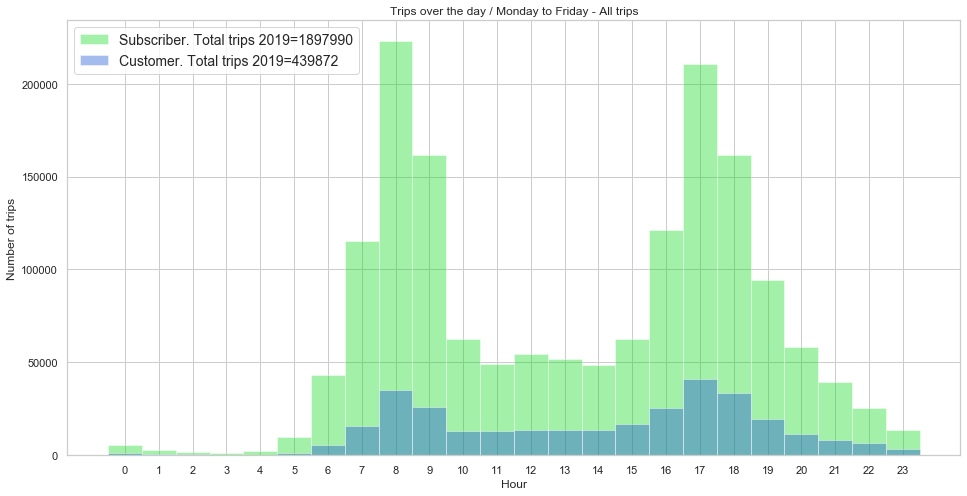

In [95]:
plt.figure(figsize = [16,8])

bin_edges = np.arange(-0.5, 23.5+1, 1)
sns.set(style="whitegrid")

label_subscriber = "Subscriber. Total trips 2019=" + str(df_subscriber.user_type.count())
label_customer = "Customer. Total trips 2019=" + str(df_customer.user_type.count()) 

sns.distplot(df_subscriber_week['hour_of_the_day'], kde = False, color='#19DB26',label=label_subscriber, bins = bin_edges)
sns.distplot(df_customer_week['hour_of_the_day'],kde = False, color='#1C56D6', label=label_customer, bins = bin_edges)

plt.xticks(np.arange(0, 24, 1));
plt.legend(prop={'size': 14})
plt.title('Trips over the day / Monday to Friday - All trips')
plt.xlabel('Hour')
plt.ylabel('Number of trips');

#### Mon Fri

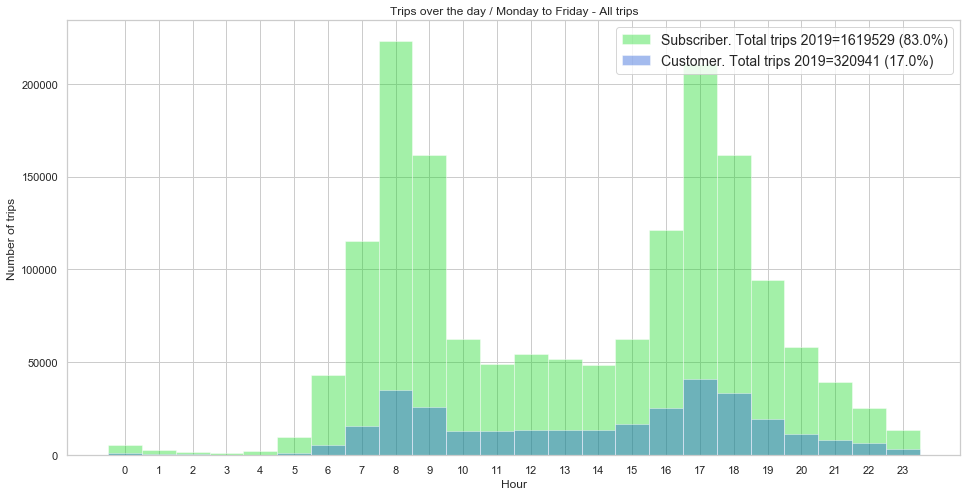

In [96]:
plt.figure(figsize = [16,8])

bin_edges = np.arange(-0.5, 23.5+1, 1)
sns.set(style="whitegrid")

label_subscriber = "Subscriber. Total trips 2019=" + str(df_subscriber_week.user_type.count()) + " (" + str(total_p_subscriber_week) + "%)"
label_customer = "Customer. Total trips 2019=" + str(df_customer_week.user_type.count()) + " (" + str(total_p_customer_week) + "%)"

sns.distplot(df_subscriber_week['hour_of_the_day'], kde = False, color='#19DB26',label=label_subscriber, bins = bin_edges)
sns.distplot(df_customer_week['hour_of_the_day'],kde = False, color='#1C56D6', label=label_customer, bins = bin_edges)

plt.xticks(np.arange(0, 24, 1));
plt.legend(prop={'size': 14})
plt.title('Trips over the day / Monday to Friday - All trips')
plt.xlabel('Hour')
plt.ylabel('Number of trips');

#### Weekend

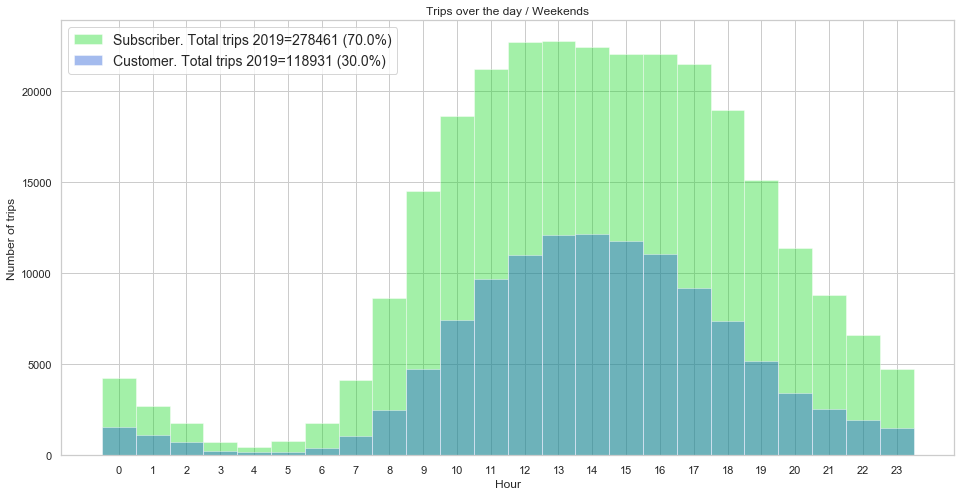

In [97]:
#trips over the day from midnight to 23h - WEEKEND
plt.figure(figsize = [16,8])

bin_edges = np.arange(-0.5, 23.5+1, 1)
sns.set(style="whitegrid")

label_subscriber = "Subscriber. Total trips 2019=" + str(df_subscriber_weekend.user_type.count()) + " (" + str(total_p_subscriber_weekend) + "%)"
label_customer = "Customer. Total trips 2019=" + str(df_customer_weekend.user_type.count()) + " (" + str(total_p_customer_weekend) + "%)"

sns.distplot(df_subscriber_weekend['hour_of_the_day'], kde = False, color='#19DB26', label=label_subscriber, bins = bin_edges)
sns.distplot(df_customer_weekend['hour_of_the_day'],kde = False,color='#1C56D6', label=label_customer, bins = bin_edges)

plt.xticks(np.arange(0, 24, 1));
plt.legend(prop={'size': 14})
plt.title('Trips over the day / Weekends')
plt.xlabel('Hour')
plt.ylabel('Number of trips');

In [101]:
df_2019.head(1)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,distance_km,duration_min,hour_of_the_day,day_of_the_week,month,day
5,2019-01-31 22:35:50,2019-02-01 00:28:04,245.0,Downtown Berkeley BART,37.870139,-122.268422,266.0,Parker St at Fulton St,37.862464,-122.264791,3532,Subscriber,0.9,112.22,22,Thu,Jan,31


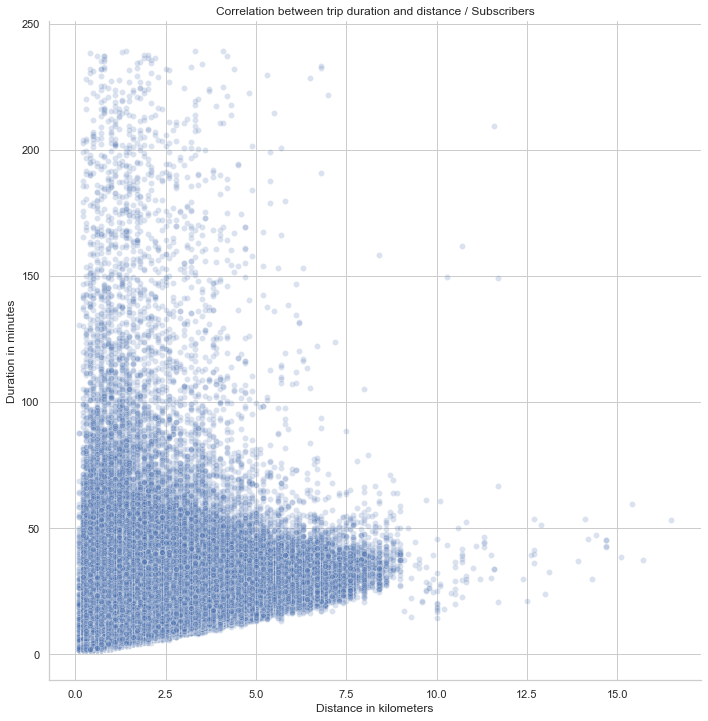

In [140]:
sns.relplot(x="distance_km", y="duration_min", alpha=.2, palette="muted", height=10, data=df_subscriber);

plt.title('Correlation between trip duration and distance / Subscribers')
plt.xlabel('Distance in kilometers')
plt.ylabel('Duration in minutes');

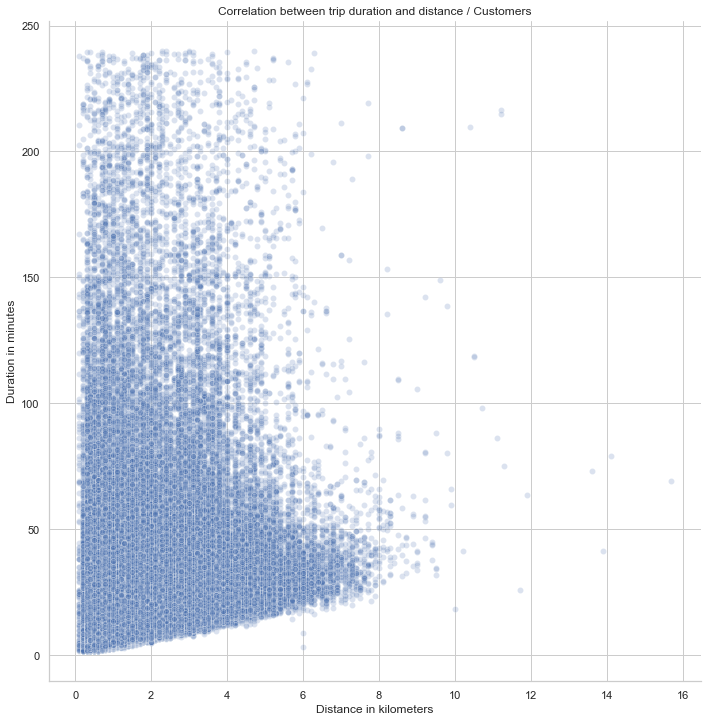

In [139]:


sns.relplot(x="distance_km", y="duration_min", alpha=.2, palette="muted", height=10, data=df_customer)
plt.title('Correlation between trip duration and distance / Customers')
plt.xlabel('Distance in kilometers')
plt.ylabel('Duration in minutes');

### Stations

In [104]:
df_2019.start_station_id.nunique()

427

In [116]:
stations_start = df_2019.groupby('start_station_name').start_station_id.count()
stations_end = df_2019.groupby('end_station_name').start_station_id.count()

In [122]:

stations_start =  stations_start.sort_values()
stations_end =  stations_end.sort_values()



In [115]:
stations_start.tail(20)

start_station_name
The Embarcadero at Steuart St                                      18799
4th St at 16th St                                                  19525
Civic Center/UN Plaza BART Station (Market St at McAllister St)    19977
Beale St at Harrison St                                            20338
Townsend St at 7th St                                              20698
4th St at Mission Bay Blvd S                                       20908
Embarcadero BART Station (Beale St at Market St)                   21591
3rd St at Townsend St                                              22629
2nd St at Townsend St                                              23904
The Embarcadero at Sansome St                                      27395
Powell St BART Station (Market St at 5th St)                       29613
Howard St at Beale St                                              30823
Steuart St at Market St                                            31836
Powell St BART Station (Market S

In [119]:
stations_end.tail(20)

end_station_name
4th St at 16th St                                                  19487
8th St at Brannan St                                               19735
Beale St at Harrison St                                            21119
3rd St at Townsend St                                              21272
Embarcadero BART Station (Beale St at Market St)                   21818
Civic Center/UN Plaza BART Station (Market St at McAllister St)    22659
Townsend St at 7th St                                              22928
4th St at Mission Bay Blvd S                                       24532
2nd St at Townsend St                                              25130
Howard St at Beale St                                              28855
Powell St BART Station (Market St at 5th St)                       30652
The Embarcadero at Sansome St                                      31894
Steuart St at Market St                                            32687
Powell St BART Station (Market St 

In [127]:
stations_start.head(200)

start_station_name
Frida Kahlo Way at Cloud Cir        3
Newbury Park Dr at King Rd          6
Woolsey St at Sacramento St1        6
Park Ave at Laurel Grove Ln         7
16th St Depot                      13
                                 ... 
Franklin St at 9th St            2448
Brannan St at 4th St             2451
Telegraph Ave at Alcatraz Ave    2452
Folsom St at 5th St              2465
32nd St at Adeline St            2475
Name: start_station_id, Length: 200, dtype: int64

In [126]:
stations_end.head(50)

end_station_name
Frida Kahlo Way at Cloud Cir             2
Newbury Park Dr at King Rd               3
Park Ave at Laurel Grove Ln              6
Woolsey St at Sacramento St1             7
Devine St at San Pedro St                9
Egbert Ave at Jennings St               12
Arguello Blvd at Edward St              15
19th St at William St                   15
St James St at 9th St                   19
Columbia Ave at Bird Ave                23
Evans Ave at Mendell St                 28
Willow St at Blewett Ave                29
Webster St at Clay St                   29
22nd St at William St                   32
23rd St at Taylor St                    34
Jennings St at Revere Ave               35
Turk Blvd at Stanyan St                 36
Quesada Ave at 3rd St                   38
Heron's Head Park                       41
9th Ave at Geary Blvd                   52
Frederick St at Arguello Blvd           54
McKinnon Ave at 3rd St                  55
Funston Ave at Clement St            

## Storing the data after changes

In [128]:
df_2019.to_csv('./data/2019_lyft_bike_sharing_rides.csv', 
                 index=False, encoding = 'utf-8')